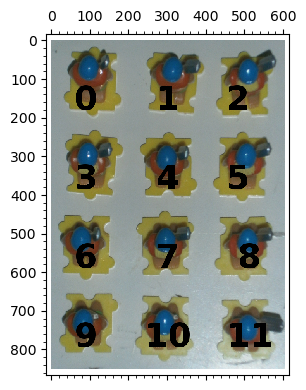

In [1]:
import pylab
I = pylab.imread('rowmen3.png')
show(matrix_plot(I))

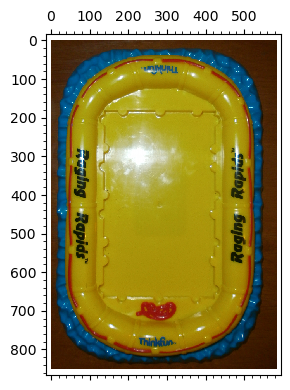

In [2]:
boat = pylab.imread('rowmen_boat.png')
show(matrix_plot(boat))

In [3]:
#Data
Nrows = 4
Ncols = 3
R = Nrows*Ncols
#South, West, North, East
S = [1,0,0,1,0,1,1,0,1,0,1,0]
W = [0,1,0,1,1,0,1,1,0,0,0,0]
N = [1,0,1,1,1,1,0,1,0,0,0,0]
E = [0,1,1,1,0,1,0,1,1,1,0,0]
#Boundary
SB = [0,0,0]
WB = [1,0,0,0]
NB = [1,1,1]
EB = [1,1,1,0]

p = MixedIntegerLinearProgram(maximization=True, solver = "GLPK")
w = p.new_variable(binary=True)

#Non-ubiquity
for r in range(R):
    p.add_constraint(sum(w[r,j,k] for j in range(Nrows) for k in range(Ncols)) <= 1)

#Only one in each place
for j in range(Nrows):
    for k in range(Ncols):
        p.add_constraint(sum(w[r,j,k] for r in range(R)) <= 1)

#Consistency between rowers
for r1 in range(R):
    for r2 in range(R):
        if N[r1] + S[r2] !=1:
            for j in [0,1,2]:
                for k in [0,1]:
                    p.add_constraint(w[r1,j,k] + w[r2,j+1,k] <= 1)
        if S[r1] + N[r2] !=1:
            for j in [0,1,2]:
                for k in [0,1]:
                    p.add_constraint(w[r1,j+1,k] + w[r2,j,k] <= 1)
        if W[r1] + E[r2] !=1:
            for j in [0,1,2]:
                for k in [0,1]:
                    p.add_constraint(w[r1,j,k+1] + w[r2,j,k] <= 1)
        if E[r1] + W[r2] !=1:
            for j in [0,1,2]:
                for k in [0,1]:
                    p.add_constraint(w[r1,j,k] + w[r2,j,k+1] <= 1)
                    
#Boundary
for r in range(R):
    for k in range(Ncols):
        if N[r] + NB[k] != 1:
            p.add_constraint(w[r,3,k]==0)
        if S[r] + SB[k] != 1:
            p.add_constraint(w[r,0,k]==0)
    for j in range(Nrows):
        if W[r] + WB[j] != 1:
            p.add_constraint(w[r,j,0]==0)
        if E[r] + EB[j] != 1:
            p.add_constraint(w[r,j,2]==0)

p.set_objective(sum(w[r,j,k] for j in range(Nrows) for k in range(Ncols) for r in range(R)) )
p.show()

Maximization:
  x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11 + x_12 + x_13 + x_14 + x_15 + x_16 + x_17 + x_18 + x_19 + x_20 + x_21 + x_22 + x_23 + x_24 + x_25 + x_26 + x_27 + x_28 + x_29 + x_30 + x_31 + x_32 + x_33 + x_34 + x_35 + x_36 + x_37 + x_38 + x_39 + x_40 + x_41 + x_42 + x_43 + x_44 + x_45 + x_46 + x_47 + x_48 + x_49 + x_50 + x_51 + x_52 + x_53 + x_54 + x_55 + x_56 + x_57 + x_58 + x_59 + x_60 + x_61 + x_62 + x_63 + x_64 + x_65 + x_66 + x_67 + x_68 + x_69 + x_70 + x_71 + x_72 + x_73 + x_74 + x_75 + x_76 + x_77 + x_78 + x_79 + x_80 + x_81 + x_82 + x_83 + x_84 + x_85 + x_86 + x_87 + x_88 + x_89 + x_90 + x_91 + x_92 + x_93 + x_94 + x_95 + x_96 + x_97 + x_98 + x_99 + x_100 + x_101 + x_102 + x_103 + x_104 + x_105 + x_106 + x_107 + x_108 + x_109 + x_110 + x_111 + x_112 + x_113 + x_114 + x_115 + x_116 + x_117 + x_118 + x_119 + x_120 + x_121 + x_122 + x_123 + x_124 + x_125 + x_126 + x_127 + x_128 + x_129 + x_130 + x_131 + x_132 + x_133 + x_134 + x_135 + x_136 

  x_42 + x_69 <= 1.0
  x_43 + x_70 <= 1.0
  x_37 + x_60 <= 1.0
  x_38 + x_61 <= 1.0
  x_40 + x_63 <= 1.0
  x_41 + x_64 <= 1.0
  x_43 + x_66 <= 1.0
  x_44 + x_67 <= 1.0
  x_48 + x_63 <= 1.0
  x_49 + x_64 <= 1.0
  x_51 + x_66 <= 1.0
  x_52 + x_67 <= 1.0
  x_54 + x_69 <= 1.0
  x_55 + x_70 <= 1.0
  x_48 + x_61 <= 1.0
  x_49 + x_62 <= 1.0
  x_51 + x_64 <= 1.0
  x_52 + x_65 <= 1.0
  x_54 + x_67 <= 1.0
  x_55 + x_68 <= 1.0
  x_49 + x_60 <= 1.0
  x_50 + x_61 <= 1.0
  x_52 + x_63 <= 1.0
  x_53 + x_64 <= 1.0
  x_55 + x_66 <= 1.0
  x_56 + x_67 <= 1.0
  x_60 + x_63 <= 1.0
  x_61 + x_64 <= 1.0
  x_63 + x_66 <= 1.0
  x_64 + x_67 <= 1.0
  x_66 + x_69 <= 1.0
  x_67 + x_70 <= 1.0
  x_60 + x_63 <= 1.0
  x_61 + x_64 <= 1.0
  x_63 + x_66 <= 1.0
  x_64 + x_67 <= 1.0
  x_66 + x_69 <= 1.0
  x_67 + x_70 <= 1.0
  x_60 + x_75 <= 1.0
  x_61 + x_76 <= 1.0
  x_63 + x_78 <= 1.0
  x_64 + x_79 <= 1.0
  x_66 + x_81 <= 1.0
  x_67 + x_82 <= 1.0
  x_61 + x_72 <= 1.0
  x_62 + x_73 <= 1.0
  x_64 + x_75 <= 1.0
  x_65 + x_76

  x_61 + x_132 <= 1.0
  x_62 + x_133 <= 1.0
  x_64 + x_135 <= 1.0
  x_65 + x_136 <= 1.0
  x_67 + x_138 <= 1.0
  x_68 + x_139 <= 1.0
  x_72 + x_135 <= 1.0
  x_73 + x_136 <= 1.0
  x_75 + x_138 <= 1.0
  x_76 + x_139 <= 1.0
  x_78 + x_141 <= 1.0
  x_79 + x_142 <= 1.0
  x_72 + x_133 <= 1.0
  x_73 + x_134 <= 1.0
  x_75 + x_136 <= 1.0
  x_76 + x_137 <= 1.0
  x_78 + x_139 <= 1.0
  x_79 + x_140 <= 1.0
  x_87 + x_132 <= 1.0
  x_88 + x_133 <= 1.0
  x_90 + x_135 <= 1.0
  x_91 + x_136 <= 1.0
  x_93 + x_138 <= 1.0
  x_94 + x_139 <= 1.0
  x_96 + x_135 <= 1.0
  x_97 + x_136 <= 1.0
  x_99 + x_138 <= 1.0
  x_100 + x_139 <= 1.0
  x_102 + x_141 <= 1.0
  x_103 + x_142 <= 1.0
  x_97 + x_132 <= 1.0
  x_98 + x_133 <= 1.0
  x_100 + x_135 <= 1.0
  x_101 + x_136 <= 1.0
  x_103 + x_138 <= 1.0
  x_104 + x_139 <= 1.0
  x_111 + x_132 <= 1.0
  x_112 + x_133 <= 1.0
  x_114 + x_135 <= 1.0
  x_115 + x_136 <= 1.0
  x_117 + x_138 <= 1.0
  x_118 + x_139 <= 1.0
  x_108 + x_135 <= 1.0
  x_109 + x_136 <= 1.0
  x_111 + x_138 <

In [6]:
%%time
print (p.solve())

12.0
CPU times: user 22.9 ms, sys: 0 ns, total: 22.9 ms
Wall time: 22.7 ms


In [7]:
d = p.get_values(w)
for r in range(R):
    for j in range(Nrows):
        for k in range(Ncols):
            if d[r,j,k]:
                print ('rower %d in pos (%d,%d)'%(r,j,k))

rower 0 in pos (0,2)
rower 1 in pos (3,0)
rower 2 in pos (1,1)
rower 3 in pos (1,0)
rower 4 in pos (2,2)
rower 5 in pos (0,1)
rower 6 in pos (3,1)
rower 7 in pos (2,0)
rower 8 in pos (0,0)
rower 9 in pos (3,2)
rower 10 in pos (1,2)
rower 11 in pos (2,1)


In [8]:
S = matrix(Nrows, Ncols)
for j in range(Nrows):
    for k in range(Ncols):
        for r in range(R):
            if d[r,j,k]:
                S[j,k] = r
show(S)

[ 8  5  0]
[ 3  2 10]
[ 7 11  4]
[ 1  6  9]

In [9]:
print( I.shape)

(850, 604, 4)


In [10]:
Px,Py,_ = I.shape
Sx = int(Px/Nrows)
Sy = int(Py/Ncols)
def subslice(j,k):
    return (slice(j*Sx,(j + 1)*Sx), 
            slice(k*Sy,(k + 1)*Sy),
            slice(0,4))
rower_image = [I[subslice(r//Ncols, r%Ncols)]
               for r in range(R)]

#for k, i in enumerate(rower_image):
#    print k
#    matrix_plot(i).show()

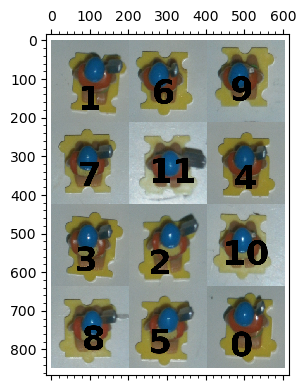

In [11]:
import numpy
sol_image = numpy.zeros(I.shape)
for j in range(Nrows):
    for k in range(Ncols):
        for r in range(R):
            if d[r,j,k]:
                sol_image[subslice(3-j,k)] = rower_image[r]
matrix_plot(sol_image).show()